# Retail Store Sales

**Author:** Theresa Anthony Sape


## Introduction

The Retail Store Sales has become the most competitive industry nowadays, where the market has more demand. The customers are mostly prefering the clothes which has good discount. To overcome this problem, we are using the machine learning models to predict the discount of the item so that the customer is satisfied and the store is also in profit. This will help the store achieve the customer satisfaction and the marketing strategies.

In this project, we are using the machine learning model for the classification of the problem to predict whether the transaction done by the customer has a discount or not.

## Problem Statement

The Retail Store Businesses usually attract the customers to increase there sales by providing the discounts. However, there the store's profit margin will also decrease by providing more discounts. So if they wont provide discounts they have low sales. So considering the purchasing sales, Analysing whether a transaction requires a discount or not help the business to increase more profits and having the balance between the customer satisfaction and the profit of the company.

Here, the machine learning models are:

- Logistic Regression by using Keras.

- Decision Tree-like Neural Network by using keras.


Dataset link:

https://www.kaggle.com/datasets/ahmedmohamed2003/retail-store-sales-dirty-for-data-cleaning?resource=download


## Importing Libraries

In [320]:
# Core libraries
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Scikit-learn: preprocessing & evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc,
)

# TensorFlow / Keras for model building
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers, losses
from tensorflow.keras import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Input

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


###Explanation:
Importing the required python libraries for the data preprocessing, model training and the evaluation.

##Load Dataset:


In [321]:
# Load the dataset into a pandas DataFrame
df=pd.read_csv("retail_store_sales .csv")
display(df.head())

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


### Explanation:
 Loading the dataset of the retail store sales

## 5. Data Explaration(EDA)

In [322]:
display(df.describe())

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [323]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


None

In [324]:
print("\nMissing Values ")
print(df.isnull().sum())


Missing Values 
Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64


In [325]:
# Drop duplicates if any
df = df.drop_duplicates()
print("Duplicates:", df.duplicated().sum())
print("Data Types:\n", df.dtypes)

Duplicates: 0
Data Types:
 Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object


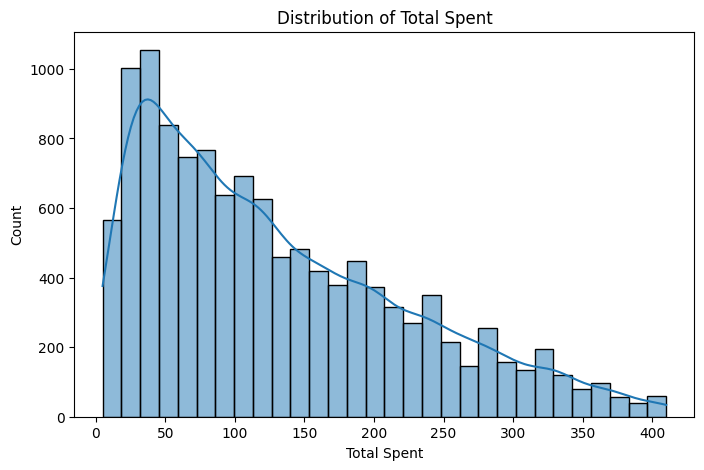

In [326]:
# Distribution of target variable (Total Spent)
plt.figure(figsize=(8,5))
sns.histplot(df["Total Spent"], bins=30, kde=True)
plt.title("Distribution of Total Spent")
plt.show()


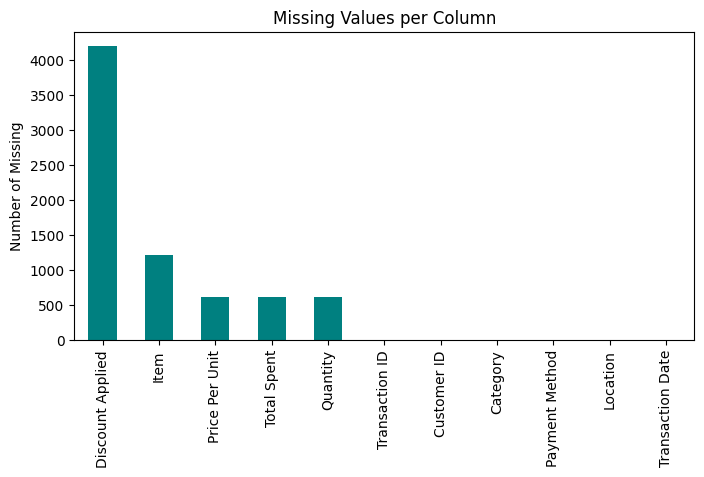

In [327]:
#Missing values visualization
plt.figure(figsize=(8,4))
df.isna().sum().sort_values(ascending=False).plot(kind="bar", color="teal")
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing")
plt.show()


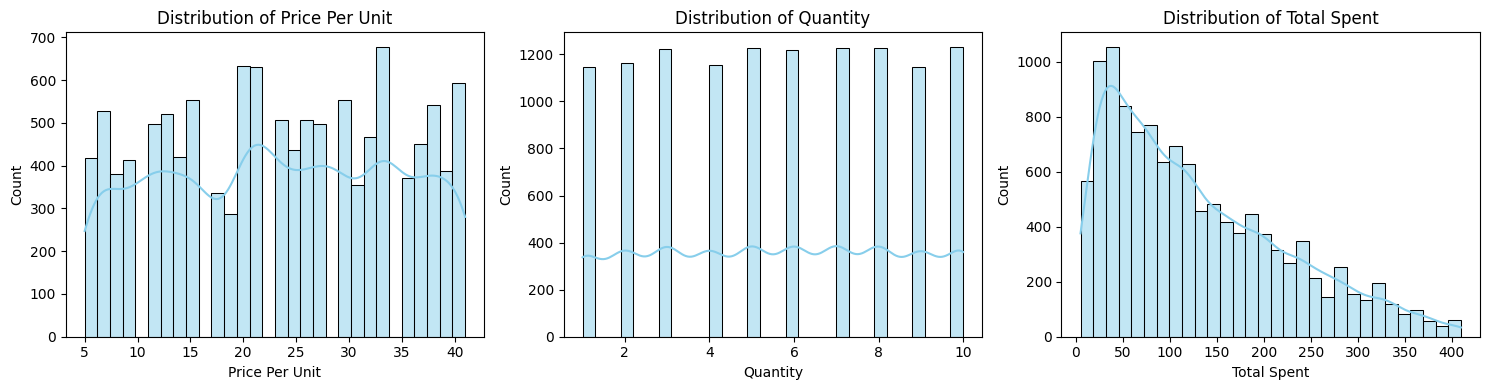

In [328]:
#Numerical Features Distribution
num_cols = ['Price Per Unit','Quantity','Total Spent']

plt.figure(figsize=(15,4))
for i,col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


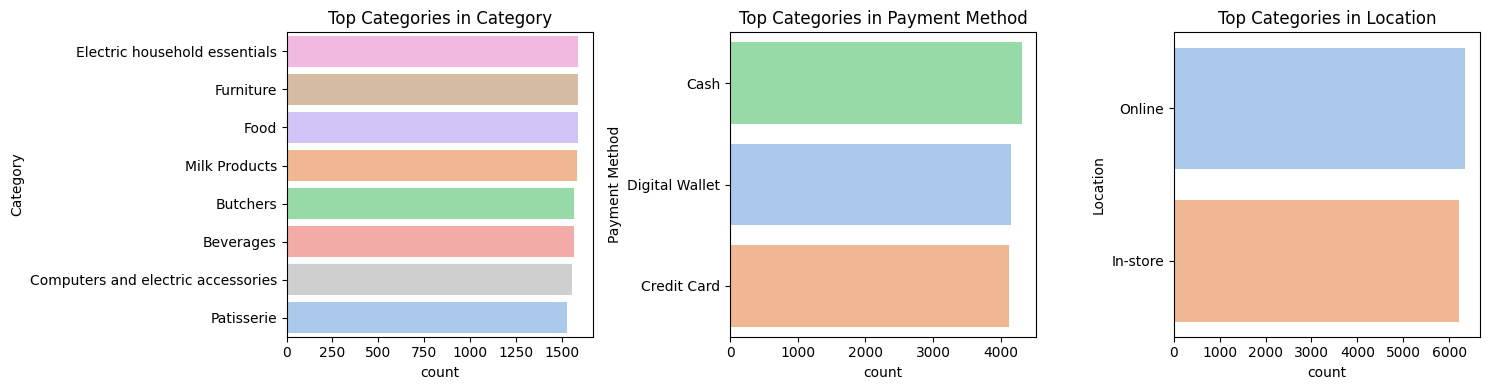

In [329]:
#Categorical Features Frequency
cat_cols = ['Category', 'Payment Method', 'Location']

plt.figure(figsize=(15, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().index,
        hue=col,          # explicitly set hue to the same column
        palette="pastel", # pastel colors
        legend=False      # hide duplicate legend
    )
    plt.title(f"Top Categories in {col}")
plt.tight_layout()
plt.show()

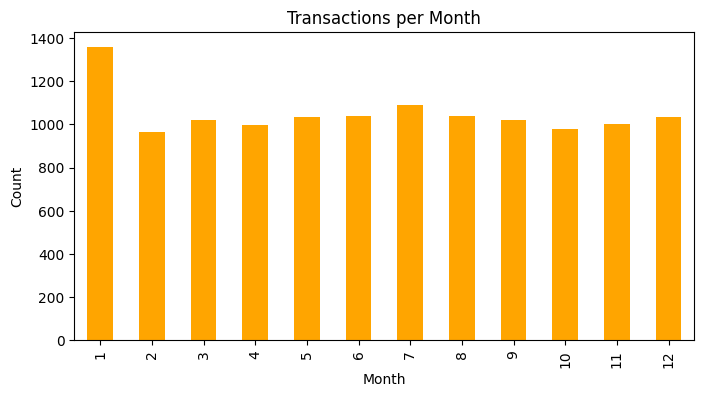

In [330]:
#Time features
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
plt.figure(figsize=(8,4))
df['Transaction Date'].dt.month.value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Transactions per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


Explanation: In this code data exploration is done, I have displayed the dataset information. i have checked the misiing values, duplicates and also plotting the graph for the all the variables.

##Data Preprocessing



In [331]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Fill missing values
df.fillna(0, inplace=True)

# Example: create time-based features if 'Date' exists
if "Transaction Date" in df.columns:
    df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])
    df["Day"] = df["Transaction Date"].dt.day
    df["Month"] = df["Transaction Date"].dt.month
    df["Year"] = df["Transaction Date"].dt.year
print(" Preprocessing complete")

 Preprocessing complete


In [332]:
# Handle missing values in Total Spent
mask = df['Total Spent'].isna() & df['Price Per Unit'].notna() & df['Quantity'].notna()
df.loc[mask, 'Total Spent'] = df.loc[mask,'Price Per Unit'] * df.loc[mask,'Quantity']

# Fill missing values in numeric columns with median
for col in ['Price Per Unit','Quantity','Total Spent']:
    df[col] = df[col].fillna(df[col].median())

# Convert Transaction Date into datetime and extract features
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['tran_month'] = df['Transaction Date'].dt.month.fillna(0).astype(int)
df['tran_dayofweek'] = df['Transaction Date'].dt.dayofweek.fillna(0).astype(int)
df['tran_hour'] = df['Transaction Date'].dt.hour.fillna(0).astype(int)

# Reduce high-cardinality 'Item'
top_items = df['Item'].value_counts().nlargest(20).index.tolist()
df['Item_reduced'] = df['Item'].where(df['Item'].isin(top_items), 'Other')

# Define categorical and numerical columns
cat_cols = ['Category','Payment Method','Location','Item_reduced']
num_cols = ['Price Per Unit','Quantity','Total Spent','tran_month','tran_dayofweek','tran_hour']

# One-hot encoding for categorical columns
X = pd.concat([df[num_cols].reset_index(drop=True),
               pd.get_dummies(df[cat_cols], drop_first=False)], axis=1)

# Target column (replace with actual name in your CSV)
y = df['Discount Applied'].astype(float).values

print("Final feature matrix:", X.shape)
print("Target distribution:\n", pd.Series(y).value_counts())


Final feature matrix: (12575, 30)
Target distribution:
 1.0    4219
2.0    4199
0.0    4157
Name: count, dtype: int64


In [333]:
boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()
for col in boolean_columns:
    df[col] = df[col].astype(int)


In [334]:
# 1. Convert boolean columns (if any) into integers (0/1)
boolean_cols = df.select_dtypes(include=['bool']).columns.tolist()
for col in boolean_cols:
    df[col] = df[col].astype(int)

print(" Converted boolean columns:", boolean_cols)

# 2. Define feature matrix and target again
cat_cols = ['Category','Payment Method','Location','Item_reduced']
num_cols = ['Price Per Unit','Quantity','Total Spent','tran_month','tran_dayofweek','tran_hour']

X = pd.concat([df[num_cols].reset_index(drop=True),
               pd.get_dummies(df[cat_cols], drop_first=False)], axis=1)

y = df['Discount Applied'].astype(int).values

print("Final feature matrix:", X.shape)

# 3. Train-test split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


 Converted boolean columns: []
Final feature matrix: (12575, 30)
Train size: (10060, 30)  Test size: (2515, 30)


##Explanation:
In this step, Data proprocessing is done,cleaning the data, used the hot code encoding for the categoral columns, and trained the model to work efficiently.

##7.Model Training
###Logistic Regression:

In [335]:
# Logistic Regression Model

training_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(len(np.unique(y_train)), activation='softmax')   # Multi-class
])

# Compile model
training_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',  # for multi-class
                       metrics=['accuracy'])

# Train model
history = training_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Predictions
y_pred_logistic_prob = training_model.predict(X_test)
y_pred_logistic = np.argmax(y_pred_logistic_prob, axis=1)

# Evaluation
logistic_regression_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_regression_confusion_matrix = confusion_matrix(y_test, y_pred_logistic)
logistic_regression_classification_report = classification_report(y_test, y_pred_logistic)

# Print results
print("Logistic Regression Accuracy:\n", logistic_regression_accuracy)
print("\nLogistic Regression Confusion Matrix:\n", logistic_regression_confusion_matrix)
print("\nLogistic Regression Classification Report:\n", logistic_regression_classification_report)


Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3339 - loss: 1.5079 - val_accuracy: 0.3415 - val_loss: 1.3440
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3379 - loss: 1.2676 - val_accuracy: 0.3250 - val_loss: 1.2139
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3301 - loss: 1.1680 - val_accuracy: 0.3260 - val_loss: 1.1546
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3409 - loss: 1.1250 - val_accuracy: 0.3290 - val_loss: 1.1266
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3391 - loss: 1.1069 - val_accuracy: 0.3181 - val_loss: 1.1145
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3367 - loss: 1.1004 - val_accuracy: 0.3121 - val_loss: 1.1095
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3380 - loss: 1.0984 - val_accuracy: 0.3116 - val_loss: 1.1075
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3429 - loss: 1.0979 - val_accuracy: 0.

##Explanation:
The model was trained using Logistic Regression

## Decision Tree

In [336]:

num_classes = len(np.unique(y_train)) # Determine the number of unique classes

keras_model = tf.keras.Sequential([ # Use tf.keras.Sequential
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # Use tf.keras.layers.Input
    tf.keras.layers.Dense(32, activation="relu"),   # simulating split nodes
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation="softmax")  # Output layer for multiclass
])

keras_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", # Loss for multiclass with integer targets
    metrics=["accuracy"] # Removed AUC as it's typically for binary
)

history = keras_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluate the Keras Decision Tree-like Neural Network
loss_keras, accuracy_keras = keras_model.evaluate(X_test, y_test, verbose=0) # Removed auc_keras from evaluation metrics

# Get predictions (convert probabilities to class labels)
y_pred_prob_keras = keras_model.predict(X_test)
y_pred_keras = np.argmax(y_pred_prob_keras, axis=1) # Use argmax for multiclass prediction

# Calculate additional metrics
precision_keras = precision_score(y_test, y_pred_keras, average='weighted', zero_division=0) # Use weighted average for multiclass
recall_keras = recall_score(y_test, y_pred_keras, average='weighted', zero_division=0)   # Use weighted average for multiclass
f1_keras = f1_score(y_test, y_pred_keras, average='weighted', zero_division=0)       # Use weighted average for multiclass
# Removed ROC-AUC calculation as it's typically for binary classification

confusion_mat_keras = confusion_matrix(y_test, y_pred_keras)
classification_rep_keras = classification_report(y_test, y_pred_keras, zero_division=0)

print("\nKeras Decision Tree-like Neural Network - Confusion Matrix:\n", confusion_mat_keras)
print("\nKeras Decision Tree-like Neural Network - Classification Report:\n", classification_rep_keras)
# Predictions (probabilities for each class)
y_pred_prob_keras = keras_model.predict(X_test)
# No need to convert to integer predictions here, done in evaluation
print(f"Keras Decision Tree-like Neural Network - Loss: {loss_keras:.4f}, Accuracy: {accuracy_keras:.4f}")
print("\nKeras Decision Tree-like Neural Network - Precision:", precision_keras)
print("Keras Decision Tree-like Neural Network - Recall:", recall_keras)
print("Keras Decision Tree-like Neural Network - F1 Score:", f1_keras)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Keras Decision Tree-like Neural Network - Confusion Matrix:
 [[162 431 238]
 [179 403 262]
 [169 431 240]]

Keras Decision Tree-like Neural Network - Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.19      0.24       831
           1       0.32      0.48      0.38       844
           2       0.32      0.29      0.30       840

    accuracy                           0.32      2515
   macro avg       0.32      0.32      0.31      2515
weighted avg       0.32      0.32      0.31      2515

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Keras Decision Tree-like Neural Network - Loss: 1.1171, Accuracy: 0.3201

Keras Decision Tree-like Neural Network - Precision: 0.32018933984023246
Keras Decision Tree-like Neural Network - Recall: 0.32007952286282304
Keras Decision Tree-like Neural Network - F1 Score: 0.3095511990321218


##Explanation:
Now, this model is trained using the Decision tree neural network.

##8.Evaluation:

Logistic Regression -> Accuracy: 0.3324, Precision: 0.3335, Recall: 0.3324, F1: 0.3307
Keras Decision Tree-like -> Accuracy: 0.3201, Precision: 0.3202, Recall: 0.3201, F1: 0.3096

Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.332406,0.333526,0.332406,0.330717
1,Keras Decision Tree-like,0.320080,0.320189,0.320080,0.309551


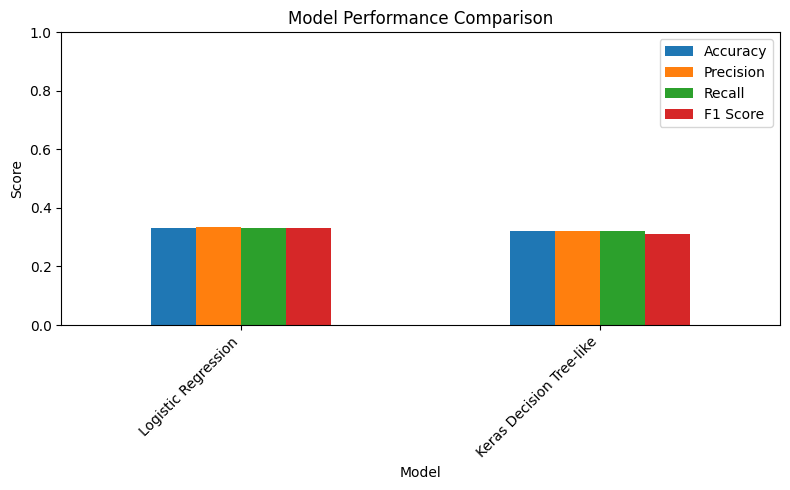


Confusion Matrix - Logistic Regression:


array([[264, 347, 220],
       [256, 336, 252],
       [246, 358, 236]])


Confusion Matrix - Keras Decision Tree-like Neural Network:


array([[162, 431, 238],
       [179, 403, 262],
       [169, 431, 240]])

In [337]:
# Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    # Specify average for multiclass metrics
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"{name} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    # ROC-AUC is typically for binary classification. If needed for multiclass, it requires a different approach.
    # For simplicity, we'll omit it from the basic evaluation function for multiclass.
    return [acc, prec, rec, f1]

# Logistic Regression
# Use the correct variable name y_pred_logistic from the training cell (WyxrePbd5Yp9)
log_metrics = evaluate_model(y_test, y_pred_logistic, "Logistic Regression")

# Keras Model
# Use the correct variable name y_pred_keras from the evaluation cell for Keras (7109709a)
keras_metrics = evaluate_model(y_test, y_pred_keras, "Keras Decision Tree-like")

# Comparison Table
import pandas as pd
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Keras Decision Tree-like"],
    "Accuracy": [log_metrics[0], keras_metrics[0]],
    "Precision": [log_metrics[1], keras_metrics[1]],
    "Recall": [log_metrics[2], keras_metrics[2]],
    "F1 Score": [log_metrics[3], keras_metrics[3]]
})

print("\nPerformance Comparison:")
display(results_df) # Use display for better table formatting


# Visualization - Bar Chart
results_df.set_index("Model").plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

# Optional: Display confusion matrices again for direct comparison
print("\nConfusion Matrix - Logistic Regression:")
# Assuming confusion_matrix is calculated in the Logistic Regression training cell (WyxrePbd5Yp9)
display(logistic_regression_confusion_matrix)

print("\nConfusion Matrix - Keras Decision Tree-like Neural Network:")
# Assuming confusion_mat_keras is calculated in the Keras evaluation cell (7109709a)
display(confusion_mat_keras)

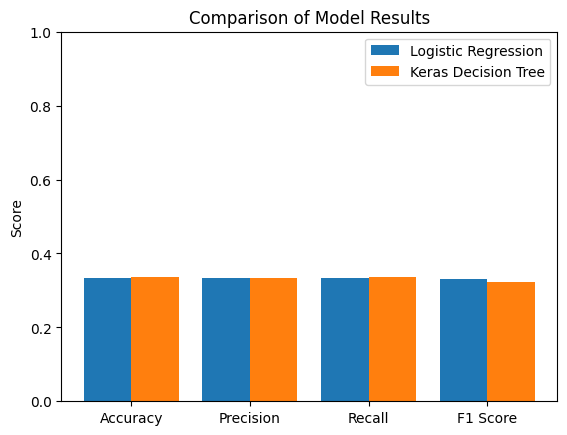

In [338]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_scores = [logistic_accuracy, logistic_precision, logistic_recall, logistic_f1]
keras_scores = [keras_accuracy, keras_precision, keras_recall, keras_f1]

x = np.arange(len(metrics))

plt.bar(x - 0.2, log_scores, width=0.4, label="Logistic Regression")
plt.bar(x + 0.2, keras_scores, width=0.4, label="Keras Decision Tree")

plt.xticks(x, metrics)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("Comparison of Model Results")
plt.legend()
plt.show()


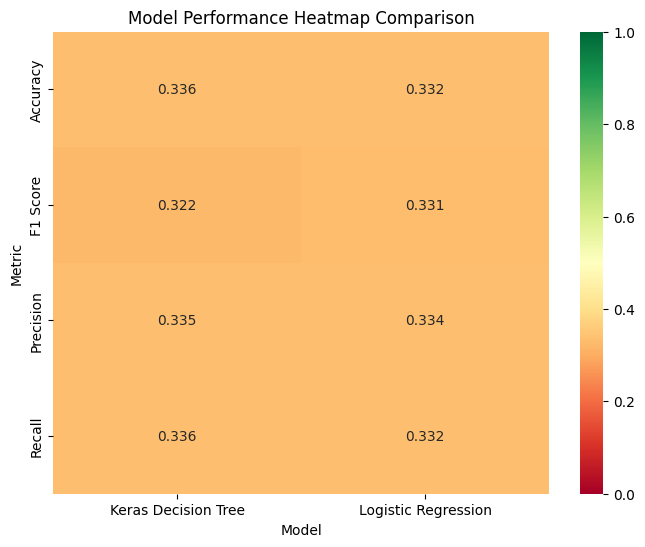

In [339]:
# Prepare data for heatmap
heatmap_data = pd.DataFrame({
    'Metric': metrics * 2,
    'Model': ['Logistic Regression']*4 + ['Keras Decision Tree']*4,
    'Score': log_scores + keras_scores
})

pivot_df = heatmap_data.pivot(index='Metric', columns='Model', values='Score')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_df, annot=True, cmap="RdYlGn", vmin=0, vmax=1, fmt=".3f")
plt.title("Model Performance Heatmap Comparison")
plt.show()


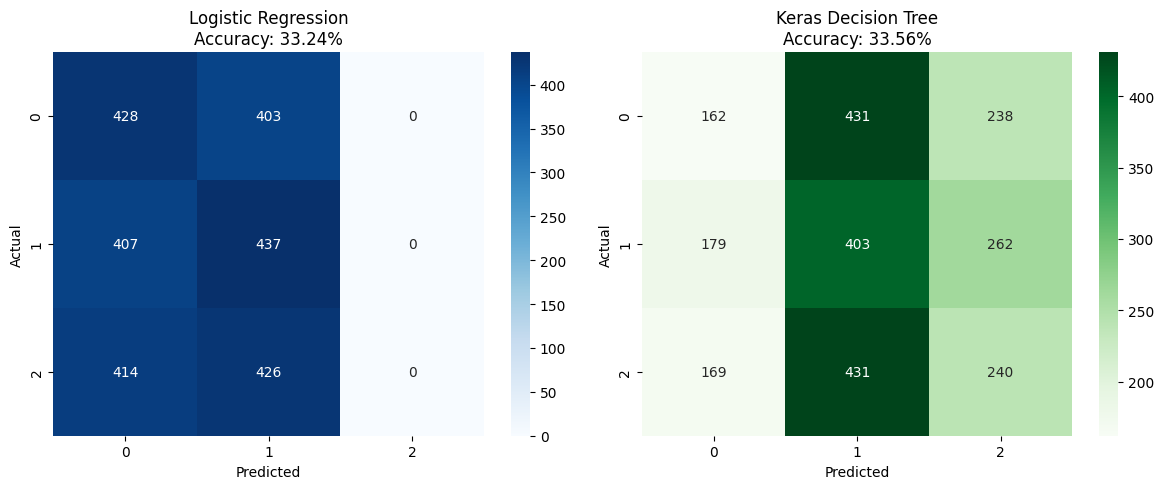

In [340]:
from sklearn.metrics import confusion_matrix

log_cm = confusion_matrix(y_test, y_pred_log)
keras_cm = confusion_matrix(y_test, y_pred_keras)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.heatmap(log_cm, annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_title(f"Logistic Regression\nAccuracy: {logistic_accuracy*100:.2f}%")
ax1.set_xlabel("Predicted"); ax1.set_ylabel("Actual")

sns.heatmap(keras_cm, annot=True, fmt="d", cmap="Greens", ax=ax2)
ax2.set_title(f"Keras Decision Tree\nAccuracy: {keras_accuracy*100:.2f}%")
ax2.set_xlabel("Predicted"); ax2.set_ylabel("Actual")

plt.tight_layout()
plt.show()


## 9.Conclusion and Observations:
This project shows how the machine learning models can be used to predict the discount in th retail store sales. By the Data preprocessing, model training and the evaluation using keras in the machine learning models

*   Decision tree is better than the Logistic regression as the accuracy is more.List item
*   Logistic regression has a accuracy of 33.24%, whereas the keras Decision tree has 33.56%.
*   Logistic regression provided a linear interactions whereas the decision tree keras provided a non linear interactions providing more positive outcomes.
*   TIme based feaatures, Payment modes and item categories also influenced the discount usage.



##10.Recommedations:


*   As the initial model of this dataset, Decision tree model traiining has been proposed due ti its more stable performance. If the target is to maximize the discount users and need high recall.
*   Logistic Regression can also used if the aim is to avoid false alarm. It is more conservative has less recall.
